In [ ]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
# Read input image
frame1 = cv.imread("drive/MyDrive/CV_data/frame1_a.png")
frame2 = cv.imread("drive/MyDrive/CV_data/frame1_b.png")
# Convert images to grayscale
frame1_gray = cv.cvtColor(frame1,cv.COLOR_BGR2GRAY)/255
frame2_gray = cv.cvtColor(frame2,cv.COLOR_BGR2GRAY)/255

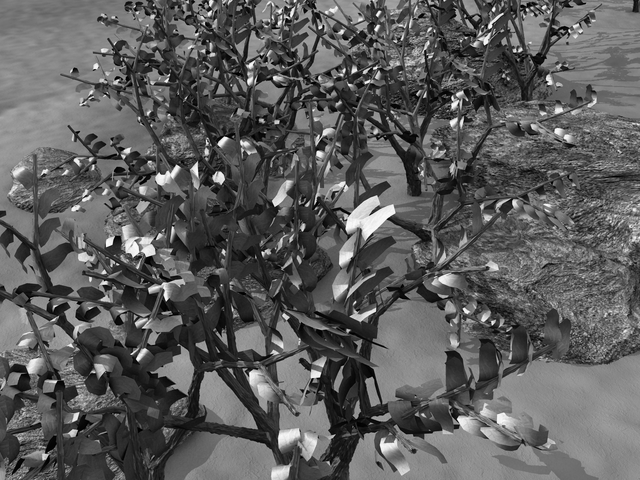

In [ ]:
cv2_imshow(frame1)

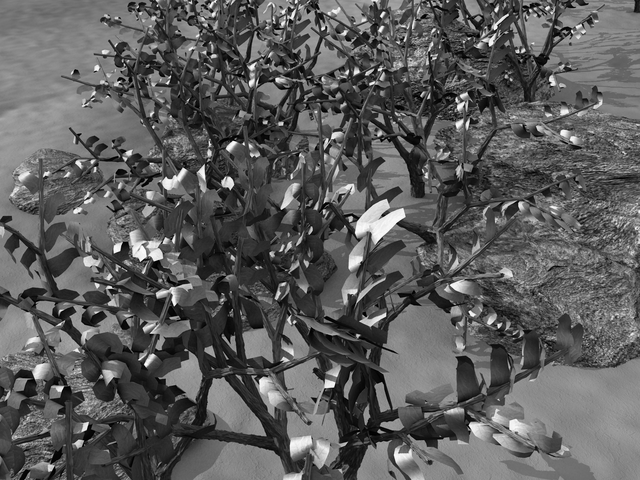

In [ ]:
cv2_imshow(frame2)

In [ ]:
print(frame1_gray.shape)

(480, 640)


In [ ]:
#!pip install opencv-contrib-python==4.4.0.44

In [ ]:
# Convolve images
def convolve(image, kernel):
  kernel_h = kernel.shape[0]
  kernel_w = kernel.shape[1]
  padding = kernel_h//2
  # Padding image
  image_pad = np.zeros((image.shape[0]+padding*2, image.shape[1]+padding*2))
  image_pad[padding:-padding, padding:-padding] = image
  image_conv = np.zeros_like(image)
  # Calulate convolution
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      x = image_pad[i:i+kernel_h, j:j+kernel_w]
      image_conv[i][j]=(x*kernel).sum()
  return image_conv

In [ ]:
def optical_flow(image1, image2):
  # Gx and Gy filter
  gx = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
  gy = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
  # Convolve with gx filter
  Ix = convolve(image1,gx)
  Ix_pad = np.zeros((Ix.shape[0]+2,Ix.shape[1]+2))
  Ix_pad[1:-1, 1:-1] = Ix
  # Convolve with gy filter
  Iy = convolve(image1,gy)
  Iy_pad = np.zeros((Iy.shape[0]+2,Iy.shape[1]+2))
  Iy_pad[1:-1, 1:-1] = Iy
  # Calculate difference of image intensities
  It = image2 - image1
  It_pad = np.zeros((It.shape[0]+2,It.shape[1]+2))
  It_pad[1:-1, 1:-1] = It
  # Initialize results
  OF = np.zeros_like(image1)
  Vx = np.zeros_like(image1)
  Vy = np.zeros_like(image1)
  for i in range(1,Ix_pad.shape[0]-1):
    for j in range(1,Ix_pad.shape[1]-1):
      # 9 points surrouding central pixel
      IX = np.array([Ix_pad[i-1,j-1], Ix_pad[i-1,j], Ix_pad[i-1,j+1], Ix_pad[i,j-1], Ix_pad[i,j],Ix_pad[i,j+1],Ix_pad[i+1,j-1],Ix_pad[i+1,j],Ix_pad[i+1,j+1]])
      IY = np.array([Iy_pad[i-1,j-1], Iy_pad[i-1,j], Iy_pad[i-1,j+1], Iy_pad[i,j-1], Iy_pad[i,j],Iy_pad[i,j+1],Iy_pad[i+1,j-1],Iy_pad[i+1,j],Iy_pad[i+1,j+1]])
      IT = np.array([It_pad[i-1,j-1], It_pad[i-1,j], It_pad[i-1,j+1], It_pad[i,j-1], It_pad[i,j],It_pad[i,j+1],It_pad[i+1,j-1],It_pad[i+1,j],It_pad[i+1,j+1]])
      # Calculate Optical flow
      A=np.array([[(IX*IX).sum(),(IX*IY).sum()],[(IX*IY).sum(),(IY*IY).sum()]])
      B=np.array([[-((IX*IT).sum())],[-((IY*IT).sum())]])
      V = np.dot(np.linalg.pinv(A),B)
      Vx[i-1][j-1] = V[0]
      Vy[i-1][j-1] = V[1] 
      OF[i-1][j-1]=(np.sqrt(V[0]**2+V[1]**2))
    
  return OF,Vx,Vy

In [ ]:
result,Vx,Vy = optical_flow(frame1_gray, frame2_gray)

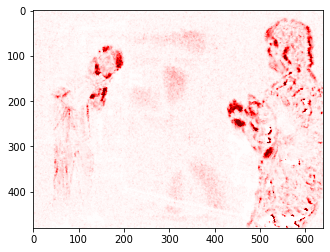

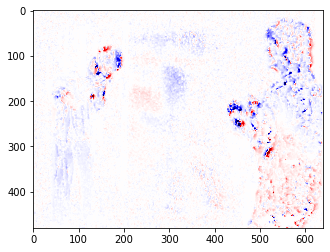

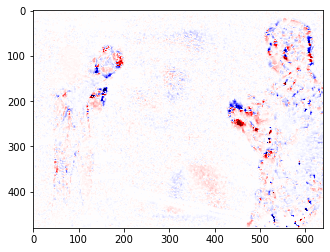

In [ ]:
plt.imshow(result, cmap='seismic', vmin=-8, vmax=8)
plt.show()
plt.imshow(Vx, cmap='seismic', vmin=-8, vmax=8)
plt.show()
plt.imshow(Vy, cmap='seismic', vmin=-8, vmax=8)
plt.show()